In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:95%}</style>"))
import sys
print(sys.executable) 
#import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import seaborn as sns
from sklearn import preprocessing

from IPython.display import HTML
HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
El codigo Python de este cuaderno está oculto para facilitar la lectura.
Para mostrar/ocultar el código, haz click <a href="javascript:code_toggle()">aquí.</a>.''')

## Load metrics

In [23]:
import pandas as pd
df_alg=pd.read_csv('output/metrics/merged_output_genetic.txt')
convert_dict = {'Dataset': "string", 
                'Algorithm': "string",
                'Population Length': "int64",
                'Generations': "int64",
                'Selection Scheme': "string",
                'Selection Candidates': "int64",
                'Crossover Scheme': "string",
                'Crossover Probability': "float64",
                'Mutation Scheme': "string",
                'Mutation Probability': "float64",
                'Replacement Scheme': "string",
                'Time(s)': "float64",
                'AvgValue': "float64",
                'BestAvgValue': "float64",
                'BestGeneration': "int64",
                'HV': "float64",
                'Spread': "float64",
                'NumSolutions': "float64",
                'Spacing': "float64",
                'NumGenerations': "int64"
               } 
df_alg = df_alg.astype(convert_dict) 
df_alg.loc[(df_alg.Dataset == 'dataset1'),'Dataset']='1'
df_alg.loc[(df_alg.Dataset == 'dataset2'),'Dataset']='2'
df_alg=df_alg.rename(columns={"Generations": "MaxGenerations"})

df_alg2=pd.read_csv('output/metrics/merged_output_grasp.txt',header=0)

convert_dict = {'Dataset': "string", 
                'Algorithm': "string",
                'Iterations': "float64",
                'Solutions per Iteration': "int64",
                'Initialization Type': "string",
                'Local Search Type': "string",
                'Path Relinking': "string",
                'Time(s)': "float64",
                'AvgValue': "float64",
                'BestAvgValue': "float64",
                'HV': "float64",
                'Spread': "float64",
                'NumSolutions': "int64",
                'Spacing': "float64",
                'NumGenerations': "int64"
               } 
df_alg2 = df_alg2.astype(convert_dict)
#display(df_alg2.head(200))

df_alg = df_alg.append(df_alg2)

df_alg3=pd.read_csv('output/metrics/merged_output_umda.txt')
convert_dict = {'Dataset': "string", 
                'Algorithm': "string",
                'Population Length': "int64",
                'Generations': "int64",
                'Time(s)': "float64",
                'AvgValue': "float64",
                'BestAvgValue': "float64",
                'BestGeneration': "int64",
                'HV': "float64",
                'Spread': "float64",
                'NumSolutions': "float64",
                'Spacing': "float64",
                'NumGenerations': "int64"
               } 
#df_alg = df_alg.astype(convert_dict) 

df_alg4=pd.read_csv('output/metrics/merged_output_pbil.txt',header=0)

convert_dict = {'Dataset': "string", 
                'Algorithm': "string",
                'Population Length': "int64",
                'Generations': "int64",
                'Time(s)': "float64",
                'AvgValue': "float64",
                'BestAvgValue': "float64",
                'HV': "float64",
                'Spread': "float64",
                'NumSolutions': "int64",
                'Spacing': "float64",
                'NumGenerations': "int64"
               } 
df_alg = df_alg.append(df_alg3)
df_alg = df_alg.append(df_alg4)
display(df_alg.head())

,Dataset,Algorithm,Population Length,MaxGenerations,Selection Scheme,Selection Candidates,Crossover Scheme,Crossover Probability,Mutation Scheme,Mutation Probability,...,Solutions per Iteration,Initialization Type,Local Search Type,Path Relinking,MaxEvaluations,Selected Individuals,Requirements per sol,NumEvaluations,Learning Rate,Mutation Shift
0,1,NSGAIIAlgorithm,100.0,100.0,tournament,2.0,onepoint,0.6,flip1bit,1.0,...,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NSGAIIAlgorithm,100.0,100.0,tournament,2.0,onepoint,0.6,flip1bit,1.0,...,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
2,1,NSGAIIAlgorithm,100.0,100.0,tournament,2.0,onepoint,0.6,flip1bit,1.0,...,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
3,1,NSGAIIAlgorithm,100.0,100.0,tournament,2.0,onepoint,0.6,flip1bit,1.0,...,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
4,1,NSGAIIAlgorithm,100.0,100.0,tournament,2.0,onepoint,0.6,flip1bit,1.0,...,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN


## Pareto analysis
Change ```dataset``` value to load different dataset Paretos

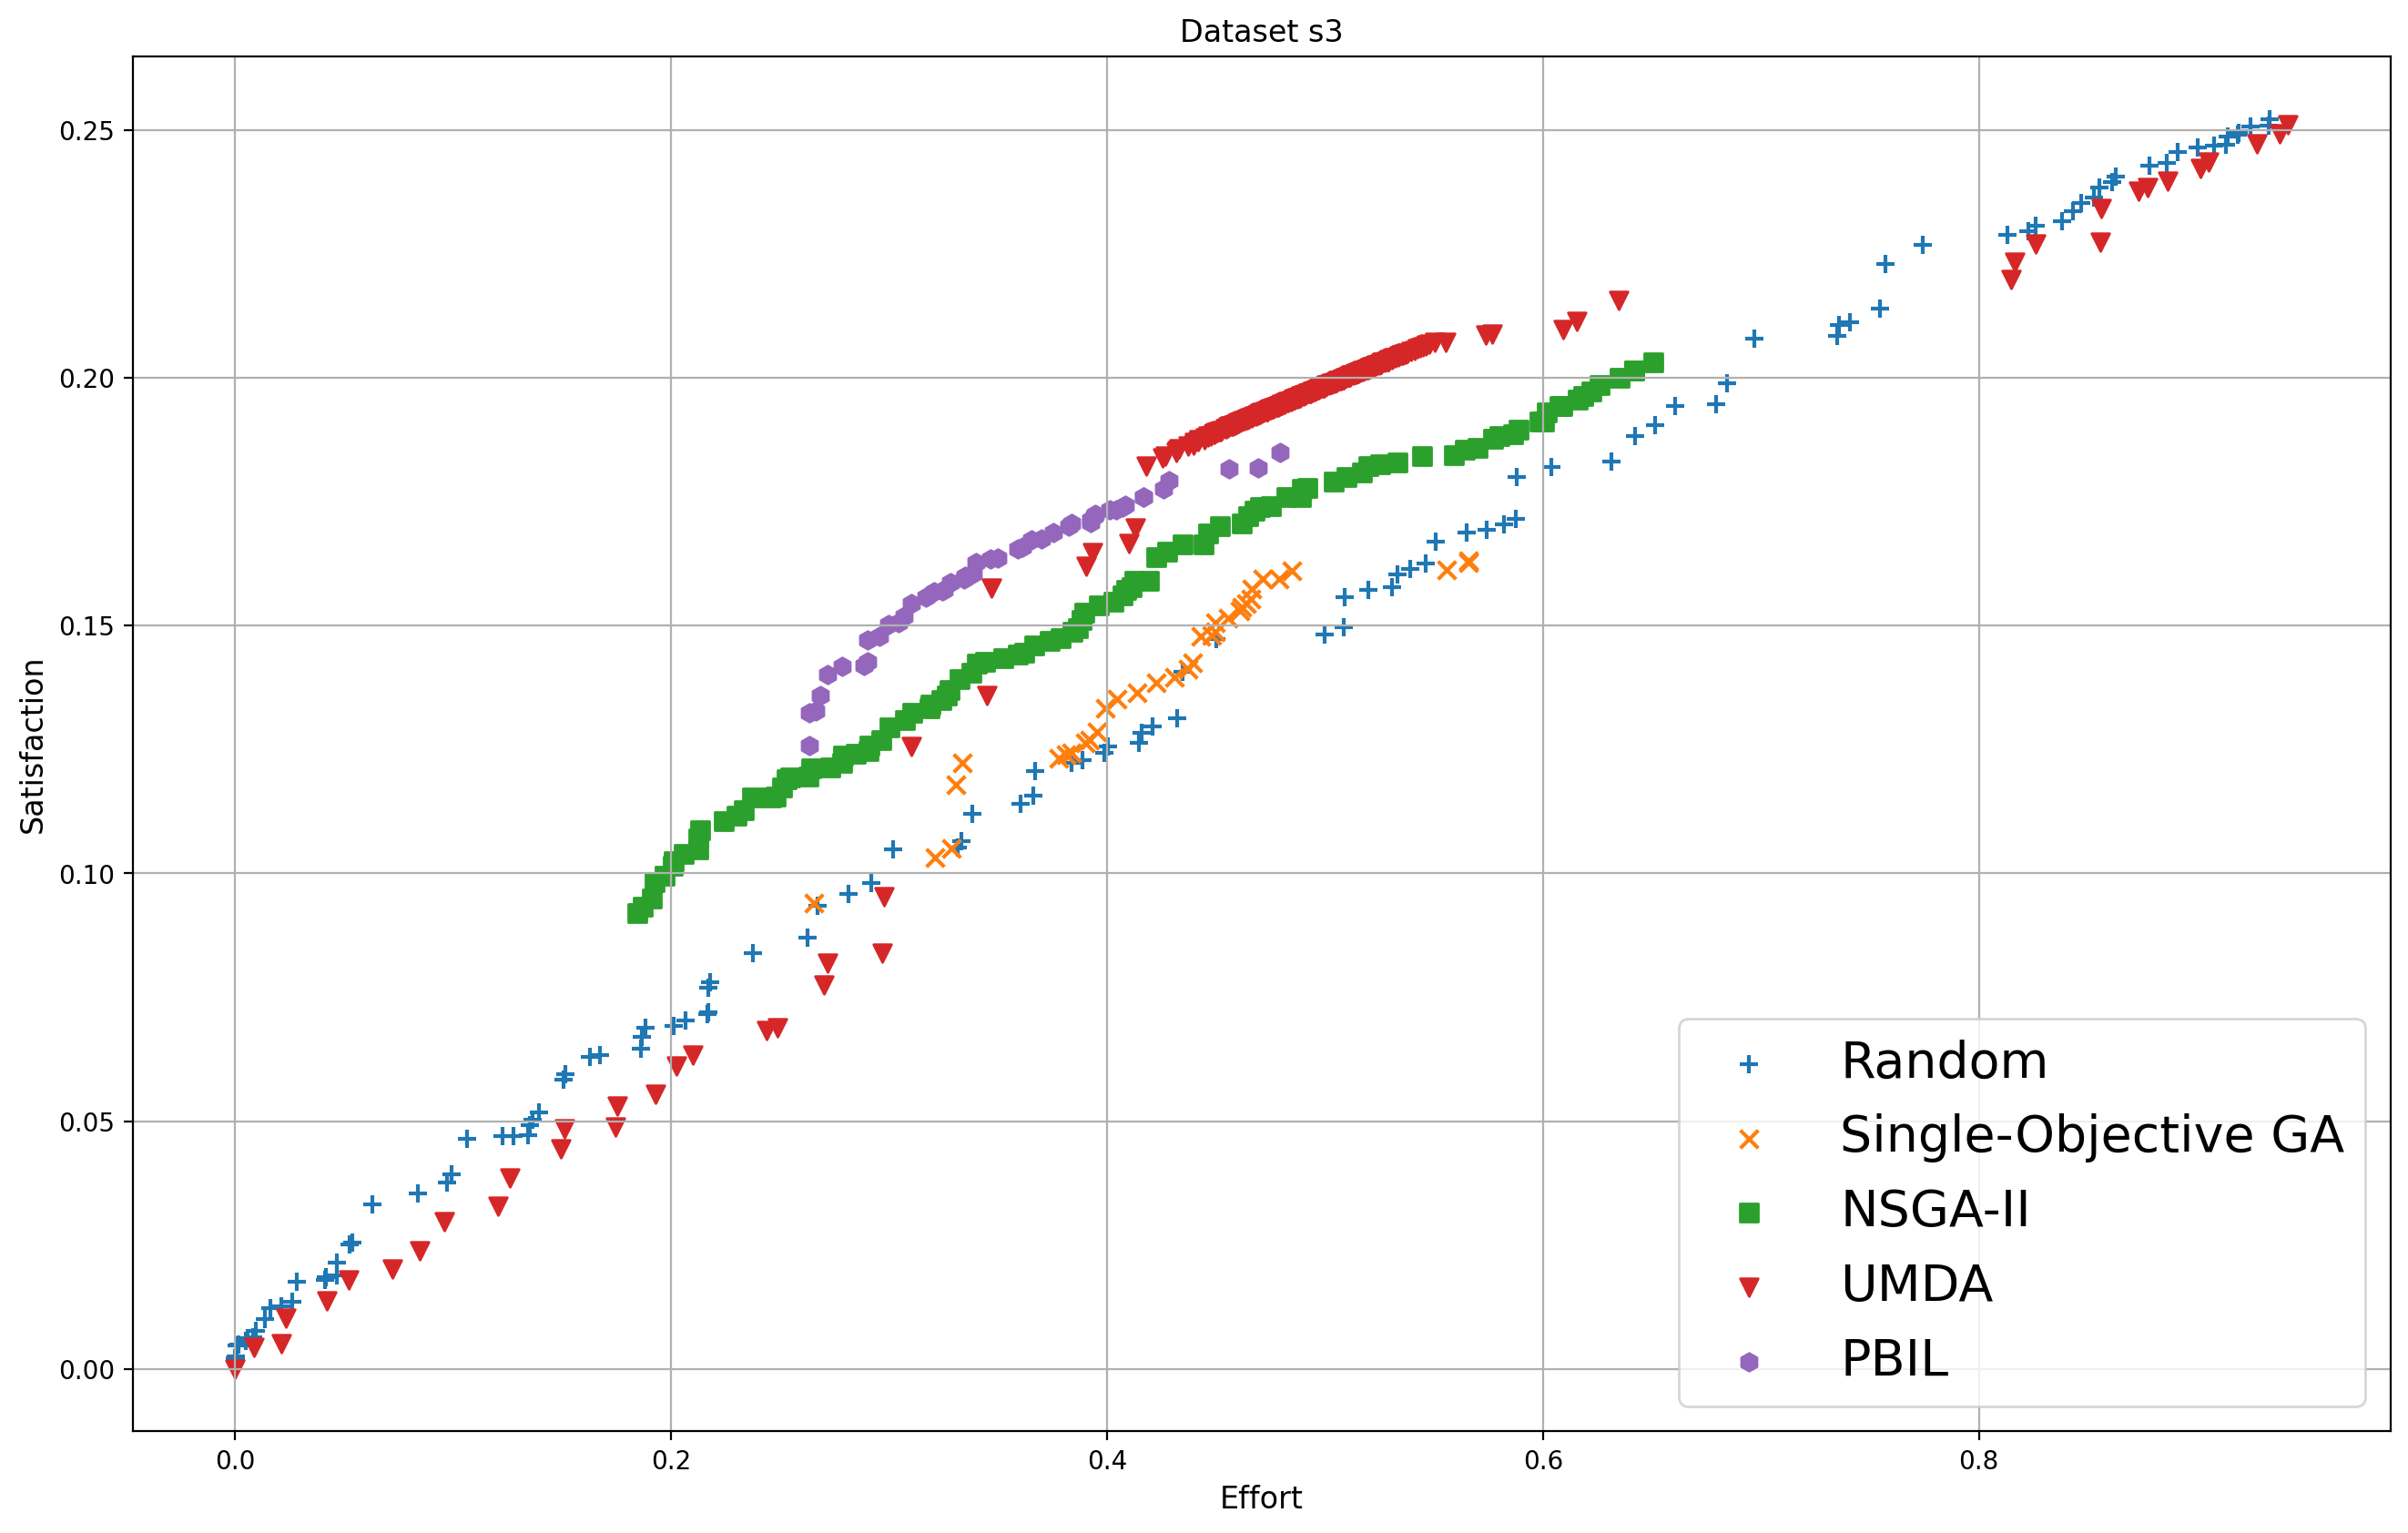

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from algorithms.GRASP.GRASP import GRASP
from algorithms.EDA.UMDA.umda_algorithm import UMDAAlgorithm
from algorithms.EDA.PBIL.pbil_algorithm import PBILAlgorithm
from algorithms.genetic.nsgaii.nsgaii_algorithm import NSGAIIAlgorithm
from algorithms.genetic.geneticnds.geneticnds_algorithm import GeneticNDSAlgorithm

sizes=[30,25,20,15,10,7,5]
markers=["+","x","s","v","h","o"]
labels=["Random","Single-Objective GA","NSGA-II","UMDA","PBIL"]
#labels=["Random","Mono-Objective GA","NSGA-II","GPPR-noLocal-PR","GPPR-SO-PR","GPPR-MO-PR"]

datasets=["1","2","s1","s2","s3"]
dataset="s3"
seed=10
generations=100
solutions_per_iteration=100
population_length=100
gens_genetic=100
algorithms = [
    GRASP(dataset=dataset,iterations=generations,solutions_per_iteration=solutions_per_iteration,seed=seed,
           init_type="uniform",local_search_type="None",
          path_relinking_mode="None"),
    GeneticNDSAlgorithm(dataset_name=dataset,random_seed=seed,population_length=100,max_generations=100,crossover_prob=0.8,
						   crossover="onepoint",mutation_prob=1.0,mutation="flip1bit",replacement="elitism"),
    NSGAIIAlgorithm(dataset_name=dataset,random_seed=seed,population_length=population_length,max_generations=gens_genetic
            ,crossover_prob=0.6,crossover="onepoint",mutation_prob=1.0,mutation="flip1bit"),
    UMDAAlgorithm(dataset_name=dataset, population_length=200, max_generations=50,
                  selected_individuals=50, selection_scheme="nds", replacement_scheme="elitism",random_seed=seed),
    PBILAlgorithm(dataset_name=dataset, population_length=100,
                   max_generations=100, learning_rate=0.5, mutation_prob=0.2, mutation_shift=0.1, random_seed=seed)
]

for i in range(len(algorithms)):  
    if "GRASP" in algorithms[i].file:
        file = "../output/output/pareto-grasp-"+algorithms[i].file
    elif "Genetic" in algorithms[i].file or "NSGA" in algorithms[i].file:
        file = "../output/output/pareto-genetic-"+algorithms[i].file
    elif "PBILAlgorithm" in algorithms[i].file:
        file = "../output/paretosEDA/pareto-pbil-"+algorithms[i].file
    elif "UMDAAlgorithm" in algorithms[i].file:
        file = "../output/paretosEDA/pareto-umda-"+algorithms[i].file
    data = np.loadtxt(file,delimiter=',', dtype=float)
    x,y=data.T
    plt.scatter(x,y,label=labels[i],s=50,marker=markers[i])


#file = "output/backtracking.txt"
#data = np.loadtxt(file,delimiter=',', dtype=float)
#x,y=data.T
#plt.scatter(x,y,label="optimo",s=10)
plt.title(dataset)
plt.xlabel('Effort', fontsize=12)
plt.ylabel('Satisfaction', fontsize=12)
plt.legend(loc="lower right",prop={'size': 20})
plt.title("Dataset "+dataset)
#plt.title("Dataset P2")
plt.grid(True)
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from algorithms.EDA.UMDA.umda_algorithm import UMDAAlgorithm
from algorithms.EDA.PBIL.pbil_algorithm import PBILAlgorithm
from datasets.Dataset import Dataset
alg=UMDAAlgorithm(dataset_name="s3", population_length=200, max_generations=50,
                  selected_individuals=50, selection_scheme="nds", replacement_scheme= "elitism",random_seed=10)
#alg.dataset=Dataset("")
alg.generate_chart(plt);
alg2=PBILAlgorithm(dataset_name="s3", population_length=100,
                   max_generations=100, learning_rate=0.5, mutation_prob=0.5, mutation_shift=0.1,random_seed=10)
#alg2.selection_scheme="monoscore"
#alg2=PBILAlgorithm(dataset_name="2",population_length=100,
                                   # max_generations=100, learning_rate=0.9, mutation_prob=0.1, mutation_shift=0.1, random_seed=10)
#alg.dataset=Dataset("")
alg2.generate_chart(plt);

## GIF

In [ ]:
import os
import imageio

import matplotlib.pyplot as plt
import numpy as np

def createGIF(algorithms,input_folder="temp", output_filename="example_gif", dpi=100,fps=1,pareto_files=None):
    plt.rcParams['figure.figsize'] = [16, 10]
    plt.rcParams['figure.dpi'] = 200
    alg_results=[]
    filenames=[]
    # execute each algorithm and store pareto steps
    for alg_index in range(len(algorithms)): 
        if pareto_files is not None and pareto_files[alg_index]:
            if "GRASP" in algorithms[alg_index].file:
                file = "../output/output/pareto-grasp-"+algorithms[alg_index].file
            else:
                file = "../output/output/pareto-genetic-"+algorithms[alg_index].file
            data = np.loadtxt(file,delimiter=',', dtype=float)
            x,y=data.T
            plt.scatter(x,y,label=algorithms[alg_index].get_name(),s=50#,marker=markers[i]
                       )
        else:
            algorithms[alg_index].debug_mode=True
            result=algorithms[alg_index].run()
            alg_results.append(result["paretos"])
            #func = [i.objectives for i in result["population"]]
            #function1 = [i[0].value for i in func]
            #function2 = [i[1].value for i in func]
            #plt.scatter(function2, function1,label=algorithms[alg_index].get_name())
            
    # loop pareto steps and generate a frame with all points for all algorithms
    for pareto_index in range(len(alg_results[0])):
        plt.cla()
        plt.clf()
        # scatter all algorithm intermediate pareto results for a frame
        for alg_index in range(len(algorithms)): 
            if pareto_files is not None and pareto_files[alg_index]:
                if "GRASP" in algorithms[alg_index].file:
                    file = "../output/output/pareto-grasp-"+algorithms[alg_index].file
                else:
                    file = "../output/output/pareto-genetic-"+algorithms[alg_index].file
                data = np.loadtxt(file,delimiter=',', dtype=float)
                x,y=data.T
                print(f"NDS loaded from file has {len(x)} solution(s)")
                plt.scatter(x,y,label=algorithms[alg_index].get_name(),s=50#,marker=markers[i]
                           )
            else:
                func = [j for j in alg_results[alg_index][pareto_index]]
                functiony = [i.total_satisfaction for i in func]
                functionx = [i.total_cost for i in func]
                plt.scatter(functionx, functiony,label=algorithms[alg_index].get_name())
            
        # config frame
        plt.xlabel('Effort', fontsize=12)
        plt.ylabel('Satisfaction', fontsize=12)
        plt.legend(loc="lower right")
        plt.title("Dataset "+str(algorithms[0].dataset_name)+" It="+str(pareto_index))
        plt.grid(True)
        plt.draw()
        # store frame
        #filename = f'input_folder+'/temp'+str(pareto_index+1)+'.png'
        filename = f'{input_folder}/temp{str(pareto_index+1)}.png'
        filenames.append(filename)
        plt.savefig(filename, dpi=dpi)
        
    
    # Build GIF
    print('Creating gif\n')
    with imageio.get_writer(f'{output_filename}.gif', mode='I',fps=fps) as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)
        for i in range(fps*5):
            writer.append_data(image)

    print('Gif saved\n')
    print('Removing Images\n')
    # Remove files
    for filename in set(filenames):
        os.remove(filename)
    print('DONE')
    

In [ ]:
from algorithms.GRASP.GRASP import GRASP
from algorithms.genetic.nsgaii.nsgaii_algorithm import NSGAIIAlgorithm
from algorithms.genetic.geneticnds.geneticnds_algorithm import GeneticNDSAlgorithm
from algorithms.EDA.UMDA.umda_algorithm import UMDAAlgorithm
from algorithms.EDA.PBIL.pbil_algorithm import PBILAlgorithm 

algorithms = [
     UMDAAlgorithm(dataset_name="s3", population_length=1000, max_generations=50,
                  selected_individuals=50, selection_scheme="nds", replacement_scheme= "elitism",random_seed=4),
    #GRASP(dataset=dataset,iterations=generations,solutions_per_iteration=solutions_per_iteration,seed=seed,
    #       init_type="stochastically",local_search_type="best_first_neighbor_random_domination",
    #      path_relinking_mode="after_local"),
]

createGIF(algorithms,"temp", "prueba_gif", dpi=100,fps=1)

In [ ]:
from algorithms.GRASP.GRASP import GRASP
from algorithms.genetic.nsgaii.nsgaii_algorithm import NSGAIIAlgorithm
from algorithms.genetic.geneticnds.geneticnds_algorithm import GeneticNDSAlgorithm
from algorithms.EDA.UMDA.umda_algorithm import UMDAAlgorithm
from algorithms.EDA.PBIL.pbil_algorithm import PBILAlgorithm 


alg = UMDAAlgorithm(dataset_name="s3", population_length=200, max_generations=50,
                  selected_individuals=50, selection_scheme="nds", replacement_scheme= "elitism",random_seed=10)

#alg = PBILAlgorithm(dataset_name="s3", population_length=200, max_generations=50,
#                  random_seed=10)

alg.createGIF("temp", "prueba_gif", dpi=100,fps=1,onlyNDS=False,max_x=1,max_y=0.3)

## Metrics analysis

In [ ]:
from algorithms.GRASP.GRASP import GRASP
from algorithms.genetic.nsgaii.nsgaii_algorithm import NSGAIIAlgorithm
from algorithms.genetic.geneticnds.geneticnds_algorithm import GeneticNDSAlgorithm
from algorithms.EDA.UMDA.umda_algorithm import UMDAAlgorithm
from algorithms.EDA.PBIL.pbil_algorithm import PBILAlgorithm 
seed=10
generations=100
solutions_per_iteration=100
population_length=100
gens_genetic=100

display(UMDAAlgorithm(dataset_name="s3", population_length=200, max_generations=50,
                  selected_individuals=50, selection_scheme="nds", replacement_scheme= "elitism",random_seed=10).df_find_data(df_alg))
        
        
display(PBILAlgorithm(dataset_name="s3", population_length=100,
                   max_generations=100, learning_rate=0.5, mutation_prob=0.5, mutation_shift=0.1, random_seed=10).df_find_data(df_alg))


display(GeneticNDSAlgorithm(dataset_name="s3",random_seed=10,population_length=100,max_generations=100,crossover_prob=0.8,
						   crossover="onepoint",mutation_prob=1.0,mutation="flip1bit",replacement="elitism").df_find_data(df_alg))

display(NSGAIIAlgorithm(dataset_name="s3",random_seed=10,population_length=population_length,max_generations=gens_genetic
            ,crossover_prob=0.6,crossover="onepoint",mutation_prob=1.0,mutation="flip1bit").df_find_data(df_alg))

In [55]:
from sklearn import preprocessing
from scipy.stats import ranksums
import numpy as np
import plotly.graph_objects as go
import plotly.offline as pyo
import math
from algorithms.GRASP.GRASP import GRASP
from algorithms.genetic.nsgaii.nsgaii_algorithm import NSGAIIAlgorithm
from algorithms.genetic.geneticnds.geneticnds_algorithm import GeneticNDSAlgorithm
from algorithms.EDA.UMDA.umda_algorithm import UMDAAlgorithm
from algorithms.EDA.PBIL.pbil_algorithm import PBILAlgorithm 

datasets=["1","2","s3"
         ]
cols=["HV","Spread","Spacing","NumSolutions","Time(s)"
     ]
maxmin=[1,-1,1,1,-1]


    

printstr=""
printstrMetrics = ["","","","",""]
    
for dat in datasets:
    print("------Dataset "+dat+"-----")
    algs = [
        GeneticNDSAlgorithm(dataset_name=dat,random_seed=10,population_length=100,max_generations=100,crossover_prob=0.8,
                               crossover="onepoint",mutation_prob=1.0,mutation="flip1bit",replacement="elitism"),
        NSGAIIAlgorithm(dataset_name=dat,random_seed=10,population_length=100,max_generations=100
                ,crossover_prob=0.6,crossover="onepoint",mutation_prob=1.0,mutation="flip1bit"),
        UMDAAlgorithm(dataset_name=dat, population_length=200, max_generations=50,
                      selected_individuals=50, selection_scheme="nds", replacement_scheme="elitism",random_seed=10),
        PBILAlgorithm(dataset_name=dat, population_length=100,
                       max_generations=100, learning_rate=0.5, mutation_prob=0.5, mutation_shift=0.1, random_seed=10)
    ]
    for j in range(len(cols)): 
        print(cols[j])
        results=list()
        best_avg=0
        best_avgn=10**9
        best_alg_index=None
        for i in range(len(algs)):
            #avg=np.mean((algs[i].findConfigurationData(df_alg)[cols])[cols[j]].values)
            avg=np.mean((algs[i].df_find_data(df_alg)[cols])[cols[j]].values)
            results.append("{:.3f}".format(avg))
            if maxmin[j]>0 and avg>best_avg:
                best_avg=avg
                best_alg_index=i
            elif maxmin[j]<0 and avg<best_avgn:
                best_avgn=avg
                best_alg_index=i

        p_best=True
        p_list=[]
        for i in range(len(algs)):
            if i!=best_alg_index:
                #dataA=(algs[best_alg_index].findConfigurationData(df_alg)[cols])[cols[j]].values
                #dataB=(algs[i].findConfigurationData(df_alg)[cols])[cols[j]].values
                dataA=(algs[best_alg_index].df_find_data(df_alg)[cols])[cols[j]].values
                dataB=(algs[i].df_find_data(df_alg)[cols])[cols[j]].values
                _, p = ranksums(dataA, dataB)
                print("p:",p)
                if p>=0.05:
                    #print(dataA)
                    #print(dataB)
                    p_best=False
                else:
                    p_list.append(i)

        if p_best:
            mark = '*'
        else:
            mark = ''
        for index in p_list:
            results[index]=results[index]+'-'
        #results[best_alg_index]=results[best_alg_index]+mark
        #results.insert(0,cols[j])
        print(results)
        
        printstrMetrics[j]+=dat+"&"
        for x in range(len(results)):
            if x in p_list:
                printstrMetrics[j]+=results[x]+"$\\downarrow$ "
            else:
                printstrMetrics[j]+="\\textbf{"+results[x]+"} "
            if x<len(results)-1:
                printstrMetrics[j]+="  &   "
            else:
                 printstrMetrics[j]+="  \\\\  "
        
        

for j in range(len(cols)):
    #print(printstrMetrics[j])
    header="\\begin{table}[!h]\\caption{Average "+cols[j]+" of best configurations for each dataset} "
    header+="\\label{tab:metrics-"+cols[j]+"}\\begin{tabular}{lllll}\\hline "
    header+="Dataset  & Single-Objective GA  & NSGA-II  & UMDA & PBIL   \\\\ \\hline "
    printstrMetrics[j]=header+printstrMetrics[j]
    
    printstrMetrics[j]+="\\hline "
    printstrMetrics[j]+="\\end{tabular} \\end{table} "
    
                    
for x in printstrMetrics:
    print("================================")
    print(x)

------Dataset 1-----
HV
p: 0.00015705228423075119
p: 0.00015705228423075119
p: 0.00015705228423075119
['0.594-', '1.000', '0.878-', '0.554-']
Spread
p: 0.00015705228423075119
p: 0.0031970994479345307
p: 0.01016520189195626
['0.615', '0.963-', '0.744-', '0.692-']
Spacing
p: 0.00015705228423075119
p: 0.00015705228423075119
p: 0.00015705228423075119
['0.323-', '0.382', '0.330-', '0.316-']
NumSolutions
p: 0.00015705228423075119
p: 0.00015705228423075119
p: 0.00015705228423075119
['26.400-', '56.000', '37.900-', '47.200-']
Time(s)
p: 0.00015705228423075119
p: 0.00015705228423075119
p: 0.00015705228423075119
['17.967-', '180.991-', '5.494-', '3.036']
------Dataset 2-----
HV
p: 0.00015705228423075119
p: 0.00015705228423075119
p: 0.00015705228423075119
['0.157-', '0.407-', '0.975', '0.138-']
Spread
p: 0.00015705228423075119
p: 0.00015705228423075119
p: 0.17361733442494354
['0.637', '0.969-', '1.008-', '0.670']
Spacing
p: 0.00015705228423075119
p: 0.00015705228423075119
p: 0.0001570522842307511